# Surfingcrypto `Portfolio`

The `surfingcrypto` portfolio.

In [98]:
%load_ext autoreload
%autoreload 2
from surfingcrypto import Config
from surfingcrypto.portfolio import Portfolio
from surfingcrypto.portfolio.tracker import Tracker

import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [99]:
c = Config("/Users/giorgiocaizzi/Documents/GitHub/surfingcrypto/config")



In [100]:
p = Portfolio("coinbase", configuration=c)



Warning! There are 14 transactionsthat were EXCLUDED in std_df.
Coinbase errors:
TransactionsHistory(Transactions:186 - Processed:186, Unhandled:0 - Errors:9)


In [101]:
p.std_df.head(10)


,type,amount,symbol,native_amount,nat_symbol,total,subtotal,total_fee,spot_price,trade_id
datetime,,,,,,,,,,
2018-10-22T06:29:22Z,buy,0.017237,BTC,100.00,EUR,100.00,97.01,2.99,5627.999719,None
2018-11-09T12:05:12Z,sell,0.017237,BTC,93.27,EUR,93.27,96.26,2.99,5584.488743,None
2018-11-09T12:06:14Z,buy,348.021666,BAT,93.27,EUR,93.27,90.28,2.99,0.259409,None
2019-01-25T14:28:56Z,sell,348.021666,BAT,35.96,EUR,35.96,37.95,1.99,0.109045,None
2021-04-20T18:57:40Z,buy,0.258429,ETH,500.00,EUR,500.00,492.66,7.34,1906.364408,None
2021-04-22T10:13:53Z,buy,0.062128,MKR,250.00,EUR,250.00,246.33,3.67,3964.873854,None
2021-04-22T19:20:15Z,sell,0.062128,MKR,213.69,EUR,213.69,216.92,3.23,3491.496921,None
2021-04-24T08:53:47Z,buy,210.343863,ADA,213.69,EUR,213.69,210.55,3.14,1.000980,None
2021-04-25T16:15:33Z,buy,0.350116,CGLD,1.65,EUR,NaN,NaN,NaN,4.712730,None


## Total fees

In [102]:
p.total_fees()


234.18000000000026

## Portfolio total investment`
Gets total investment buy summing up `fiat_deposit` and `fiat_withdrawal` investment.

<div class="alert alert-info">

Note

At the moment, when buying with a credit card, the transaction is not registered as `fiat_deposit` and so it is not included in this calculation.

</div>

In [103]:
p.coinbase.history.df[
    p.coinbase.history.df.type.isin(["fiat_deposit", "fiat_withdrawal"])
].groupby("type")[["amount"]].sum()



,amount
type,
fiat_deposit,1050.00
fiat_withdrawal,-35.96


## Portfolio live value tracker

In [104]:
t = Tracker(p.std_df, stocks_start="1-1-2021", benchmark="ETH",configuration=c)



### Load closedata log

Error log from loading data.

In [105]:
t.closedata

,Date,Close,symbol
0,2017-10-01 00:00:00+00:00,3729.454806,BTC
1,2017-10-02 00:00:00+00:00,3758.690499,BTC
2,2017-10-03 00:00:00+00:00,3675.702350,BTC
3,2017-10-04 00:00:00+00:00,3597.924171,BTC
4,2017-10-05 00:00:00+00:00,3695.389871,BTC
...,...,...,...
8049,2022-03-14 00:00:00+00:00,74.179038,SOL
8050,2022-03-15 00:00:00+00:00,75.640441,SOL
8051,2022-03-16 00:00:00+00:00,79.754432,SOL
8052,2022-03-17 00:00:00+00:00,79.174400,SOL


In [106]:
t.error_log


[]

### Benchmark

Compare stocks to benchmark.

In [107]:
t.benchmark_df.head()


,Close
Date,
2017-10-01 00:00:00+00:00,256.044212
2017-10-02 00:00:00+00:00,253.580263
2017-10-03 00:00:00+00:00,248.989454
2017-10-04 00:00:00+00:00,248.964687
2017-10-05 00:00:00+00:00,252.593705


#### Portfolio start balance

Tracker module allows to consider transactions happened before the `stocks_start` date specified.

This is done adjusting past positions to the current value at `stocks_start` date.

In [108]:
t.active_positions.head()


,Open date,Type,Qty,Symbol,Adj cost,Adj cost per share
4,2021-04-20 18:57:40+00:00,buy,0.258429,ETH,500.00,1906.364408
5,2021-04-22 10:13:53+00:00,buy,0.062128,MKR,250.00,3964.873854
6,2021-04-22 19:20:15+00:00,sell,0.062128,MKR,213.69,3491.496921
7,2021-04-24 08:53:47+00:00,buy,210.343863,ADA,213.69,1.000980
8,2021-04-25 16:15:33+00:00,buy,0.350116,CGLD,1.65,4.712730


#### Daily snapshots

The module produces daily snapshots of the portfolio balance.

In [109]:
t.daily_snapshots[-1]


,Open date,Type,Qty,Symbol,Adj cost,Adj cost per share,Date Snapshot
151,2021-08-26 19:45:55+00:00,buy,257.829804,MATIC,1360.65,1.174154,2022-03-18 00:00:00+00:00
153,2021-09-07 10:00:18+00:00,buy,72.073991,ADA,389.49,2.166873,2022-03-18 00:00:00+00:00
155,2021-09-09 23:30:55+00:00,buy,323.271703,ADA,692.45,2.142006,2022-03-18 00:00:00+00:00
147,2021-08-21 18:49:29+00:00,buy,0.006479,USDC,1117.38,0.854942,2022-03-18 00:00:00+00:00
157,2021-11-29 10:44:04+00:00,buy,21.493860,SUSHI,147.19,6.848002,2022-03-18 00:00:00+00:00
161,2021-12-23 07:27:08+00:00,buy,13.238243,UNI,195.91,14.798792,2022-03-18 00:00:00+00:00
163,2021-12-23 07:28:57+00:00,buy,1.001178,AAVE,195.57,195.339958,2022-03-18 00:00:00+00:00


### Portfolio calculations

In [110]:
combined_df = t.per_day_portfolio_calcs()

combined_df

,Open date,Type,Qty,Symbol,Adj cost,Adj cost per share,Date Snapshot,Symbol Adj Close,Adj cost daily,Benchmark Close,Benchmark DayOfBuy Close,Benchmark Equiv Shares,Benchmark Adj Cost Daily,symbol Return,Stock Gain / (Loss),Benchmark Return,Benchmark Gain / (Loss)
0,2021-04-20 18:57:40+00:00,buy,0.258429,ETH,500.00,1906.364408,2021-04-20 00:00:00+00:00,1936.596366,500.472817,1936.596366,1936.596366,0.258185,500.000000,0.015858,7.812817,0.000000,0.000000
1,2021-04-20 18:57:40+00:00,buy,0.258429,ETH,500.00,1906.364408,2021-04-21 00:00:00+00:00,1964.593249,507.708026,1964.593249,1936.596366,0.258185,507.228373,0.030544,15.048026,0.014457,7.228373
2,2021-04-20 18:57:40+00:00,buy,0.258429,ETH,500.00,1906.364408,2021-04-22 00:00:00+00:00,2000.536891,516.996908,2000.536891,1936.596366,0.258185,516.508480,0.049399,24.336908,0.033017,16.508480
3,2021-04-20 18:57:40+00:00,buy,0.258429,ETH,500.00,1906.364408,2021-04-23 00:00:00+00:00,1953.619811,504.872170,1953.619811,1936.596366,0.258185,504.395197,0.024788,12.212170,0.008790,4.395197
4,2021-04-20 18:57:40+00:00,buy,0.258429,ETH,500.00,1906.364408,2021-04-24 00:00:00+00:00,1828.220570,472.465360,1828.220570,1936.596366,0.258185,472.019002,-0.040991,-20.194640,-0.055962,-27.980998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1604,2021-09-09 23:30:55+00:00,buy,323.271703,ADA,692.45,2.142006,2022-03-18 00:00:00+00:00,0.771276,249.331760,2661.806634,2898.501595,0.238899,635.903740,-0.639928,-443.118240,-0.081661,-56.546260
1605,2021-08-21 18:49:29+00:00,buy,0.006479,USDC,1117.38,0.854942,2022-03-18 00:00:00+00:00,0.903597,0.005854,2661.806634,2758.043679,0.405135,1078.391005,0.056911,0.000315,-0.034893,-38.988995
1606,2021-11-29 10:44:04+00:00,buy,21.493860,SUSHI,147.19,6.848002,2022-03-18 00:00:00+00:00,2.987169,64.205783,2661.806634,3936.273838,0.037393,99.533552,-0.563790,-82.984217,-0.323775,-47.656448
1607,2021-12-23 07:27:08+00:00,buy,13.238243,UNI,195.91,14.798792,2022-03-18 00:00:00+00:00,8.717903,115.409713,2661.806634,3627.940496,0.054000,143.738448,-0.410904,-80.500287,-0.266304,-52.171552


In [111]:
import matplotlib.pyplot as plt


In [112]:
t.daily_grouped_metrics(combined_df,
    ["Adj cost daily"])

,value
variable,Adj cost daily
Date Snapshot,
2021-04-20,500.472817
2021-04-21,507.708026
2021-04-22,516.996908
2021-04-23,504.872170
2021-04-24,663.967701
...,...
2022-03-14,882.888676
2022-03-15,886.697179


## Portfolio daily value

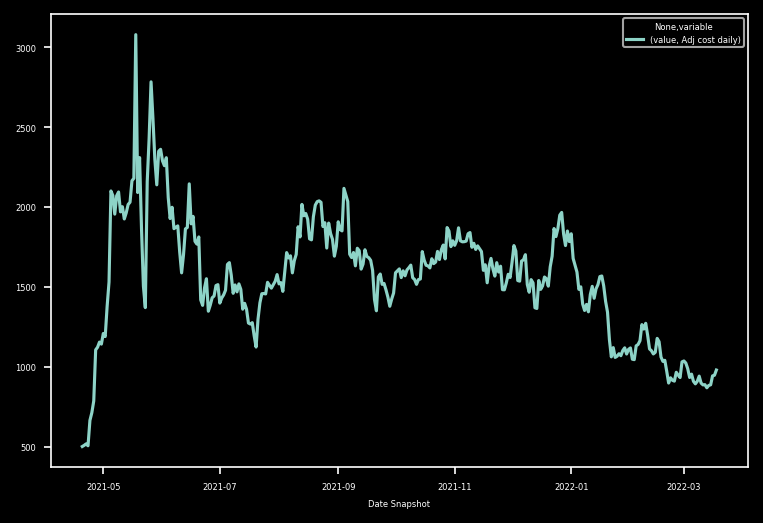

In [113]:
f, ax = plt.subplots(dpi=150)
t.daily_grouped_metrics(combined_df,
    ["Adj cost daily"]
    ).plot(ax=ax)

## Portfolio gain/loss

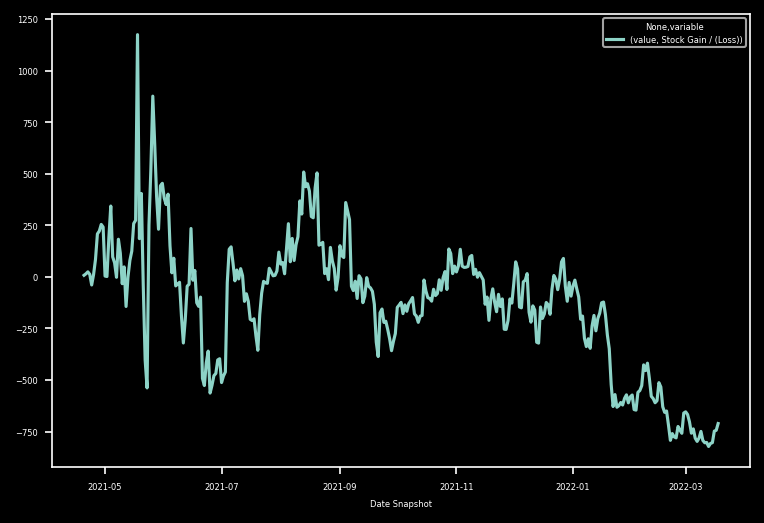

In [114]:
f, ax = plt.subplots(dpi=150)
t.daily_grouped_metrics(combined_df,
    ["Stock Gain / (Loss)"]
    ).plot(ax=ax)

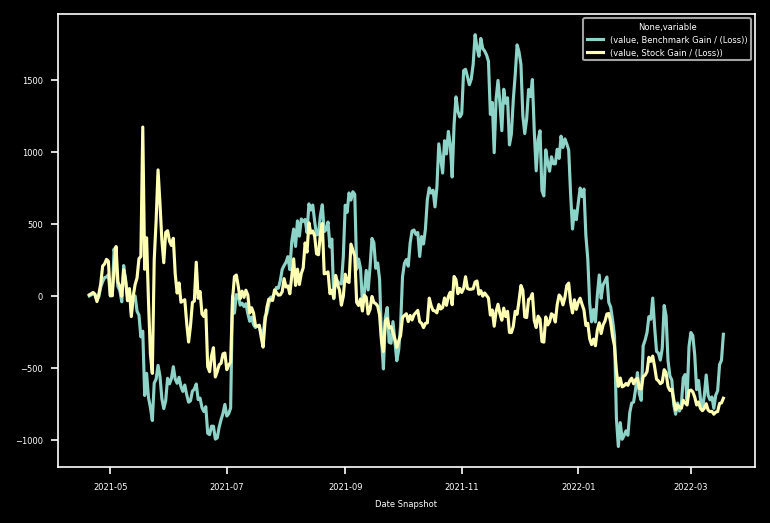

In [115]:
f, ax = plt.subplots(dpi=150)
t.daily_grouped_metrics(combined_df,
    ["Stock Gain / (Loss)","Benchmark Gain / (Loss)"]
    ).plot(ax=ax)

### Portfolio value by symbol


In [116]:
t.daily_grouped_metrics(
    combined_df,
    ["Adj cost daily"],
    by_symbol=True
    ).tail()

value                                               \
Symbol                  AAVE            ACH            ADA            AMP   
variable      Adj cost daily Adj cost daily Adj cost daily Adj cost daily   
Date Snapshot                                                               
2022-03-14        108.394041            NaN     290.439773            NaN   
2022-03-15        111.342977            NaN     288.390563            NaN   
2022-03-16        128.666204            NaN     300.720525            NaN   
2022-03-17        140.723108            NaN     298.057812            NaN   
2022-03-18        145.388408            NaN     304.920711            NaN   

                                                                           \
Symbol                  COMP            ETC            ETH           MANA   
variable      Adj cost daily Adj cost daily Adj cost daily Adj cost daily   
Date Snapshot                                                               
2022-03-14               NaN            NaN            NaN            NaN   
2022-03-15               NaN            NaN            NaN            NaN   
2022-03-16               NaN            NaN            NaN            NaN   
2022-03-17               NaN            NaN            NaN            NaN   
2022-03-18               NaN            NaN            NaN            NaN   

                                                                           \
Symbol                 MATIC            QNT            SOL          SUSHI   
variable      Adj cost daily Adj cost daily Adj cost daily Adj cost daily   
Date Snapshot                                                               
2022-03-14        324.652231            NaN            NaN      56.715679   
2022-03-15        324.477736            NaN            NaN      57.398052   
2022-03-16        343.489462            NaN            NaN      60.677799   
2022-03-17        336.624129            NaN            NaN      61.305273   
2022-03-18        349.410758            NaN            NaN      64.205783   

                                                            
Symbol                   UNI           USDC           USDT  
variable      Adj cost daily Adj cost daily Adj cost daily  
Date Snapshot                                               
2022-03-14        102.681028       0.005922            NaN  
2022-03-15        105.081948       0.005904            NaN  
2022-03-16        109.232955       0.005878            NaN  
2022-03-17        110.009915       0.005836            NaN  
2022-03-18        115.409713       0.005854            NaN

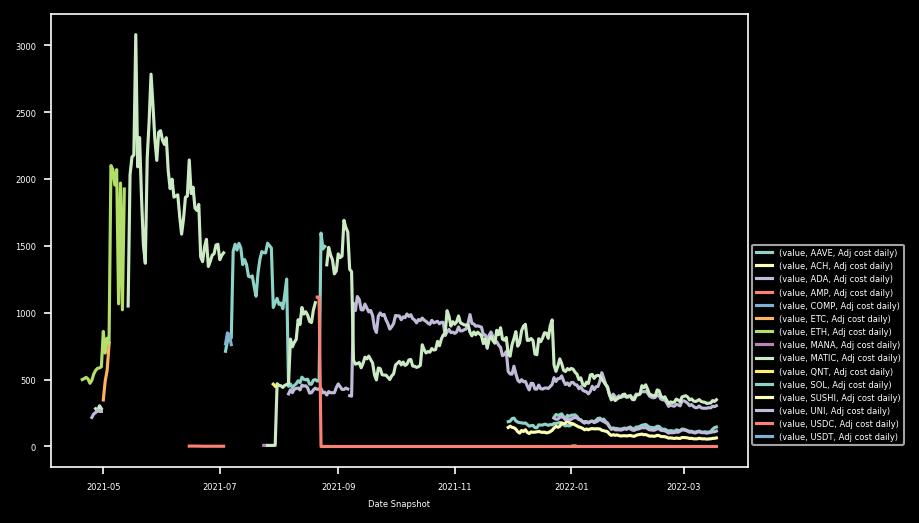

In [117]:
f, ax = plt.subplots(dpi=150)
t.daily_grouped_metrics(
    combined_df,
    ["Adj cost daily"],
    by_symbol=True
    ).plot(ax=ax,legend=False)
ax.legend(bbox_to_anchor=(1,0.5))


### Stock gain by symbol

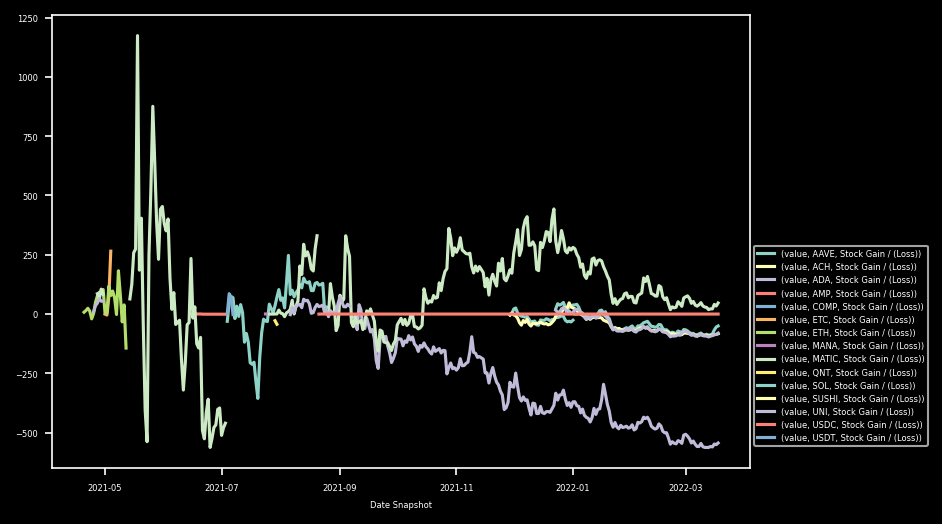

In [118]:
f, ax = plt.subplots(dpi=150)
t.daily_grouped_metrics(
    combined_df,
    ["Stock Gain / (Loss)"],
    by_symbol=True
    ).plot(ax=ax,legend=False)
ax.legend(bbox_to_anchor=(1,0.5))

### Multiple variables by symbols

In [125]:
df=t.daily_grouped_metrics(
    combined_df, ["Benchmark Gain / (Loss)","Stock Gain / (Loss)"],
    by_symbol=True
)
df.tail()

value                      \
Symbol                           AAVE                       
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-03-14                 -67.947769          -87.175959   
2022-03-15                 -66.780875          -84.227023   
2022-03-16                 -59.991115          -66.903796   
2022-03-17                 -58.857460          -54.846892   
2022-03-18                 -52.081008          -50.181592   

                                                           \
Symbol                            ACH                       
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-03-14                        NaN                 NaN   
2022-03-15                        NaN                 NaN   
2022-03-16                        NaN                 NaN   
2022-03-17                        NaN                 NaN   
2022-03-18                        NaN                 NaN   

                                                           \
Symbol                            ADA                       
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-03-14                -197.596325         -558.185388   
2022-03-15                -189.510465         -560.234599   
2022-03-16                -142.461595         -547.904637   
2022-03-17                -134.606065         -550.567350   
2022-03-18                 -87.649417         -543.704450   

                                                           \
Symbol                            AMP                       
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-03-14                        NaN                 NaN   
2022-03-15                        NaN                 NaN   
2022-03-16                        NaN                 NaN   
2022-03-17                        NaN                 NaN   
2022-03-18                        NaN                 NaN   

                                                           ...  \
Symbol                           COMP                      ...   
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)  ...   
Date Snapshot                                              ...   
2022-03-14                        NaN                 NaN  ...   
2022-03-15                        NaN                 NaN  ...   
2022-03-16                        NaN                 NaN  ...   
2022-03-17                        NaN                 NaN  ...   
2022-03-18                        NaN                 NaN  ...   

                                                           \
Symbol                            SOL                       
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-03-14                        NaN                 NaN   
2022-03-15                        NaN                 NaN   
2022-03-16                        NaN                 NaN   
2022-03-17                        NaN                 NaN   
2022-03-18                        NaN                 NaN   

                                                           \
Symbol                          SUSHI                       
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-03-14                 -58.662693          -90.474321   
2022-03-15                 -57.853257          -89.791948   
2022-03-16                 -53.143426          -86.512201   
2022-03-17                 -52.357047          -85.884727   
2022-03-18                 -47.656448          -82.984217   

                                                           \
Symbol                            UNI                       
variable      B

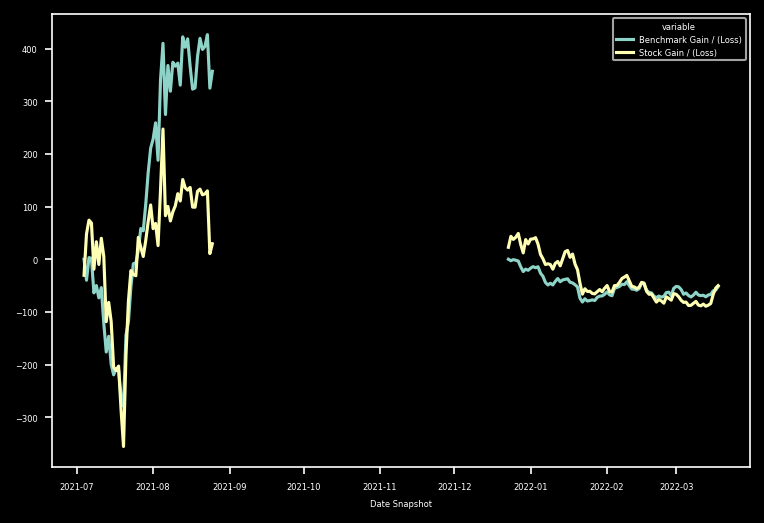

In [129]:
f, ax = plt.subplots(dpi=150)
df[("value","AAVE")].plot(ax=ax)

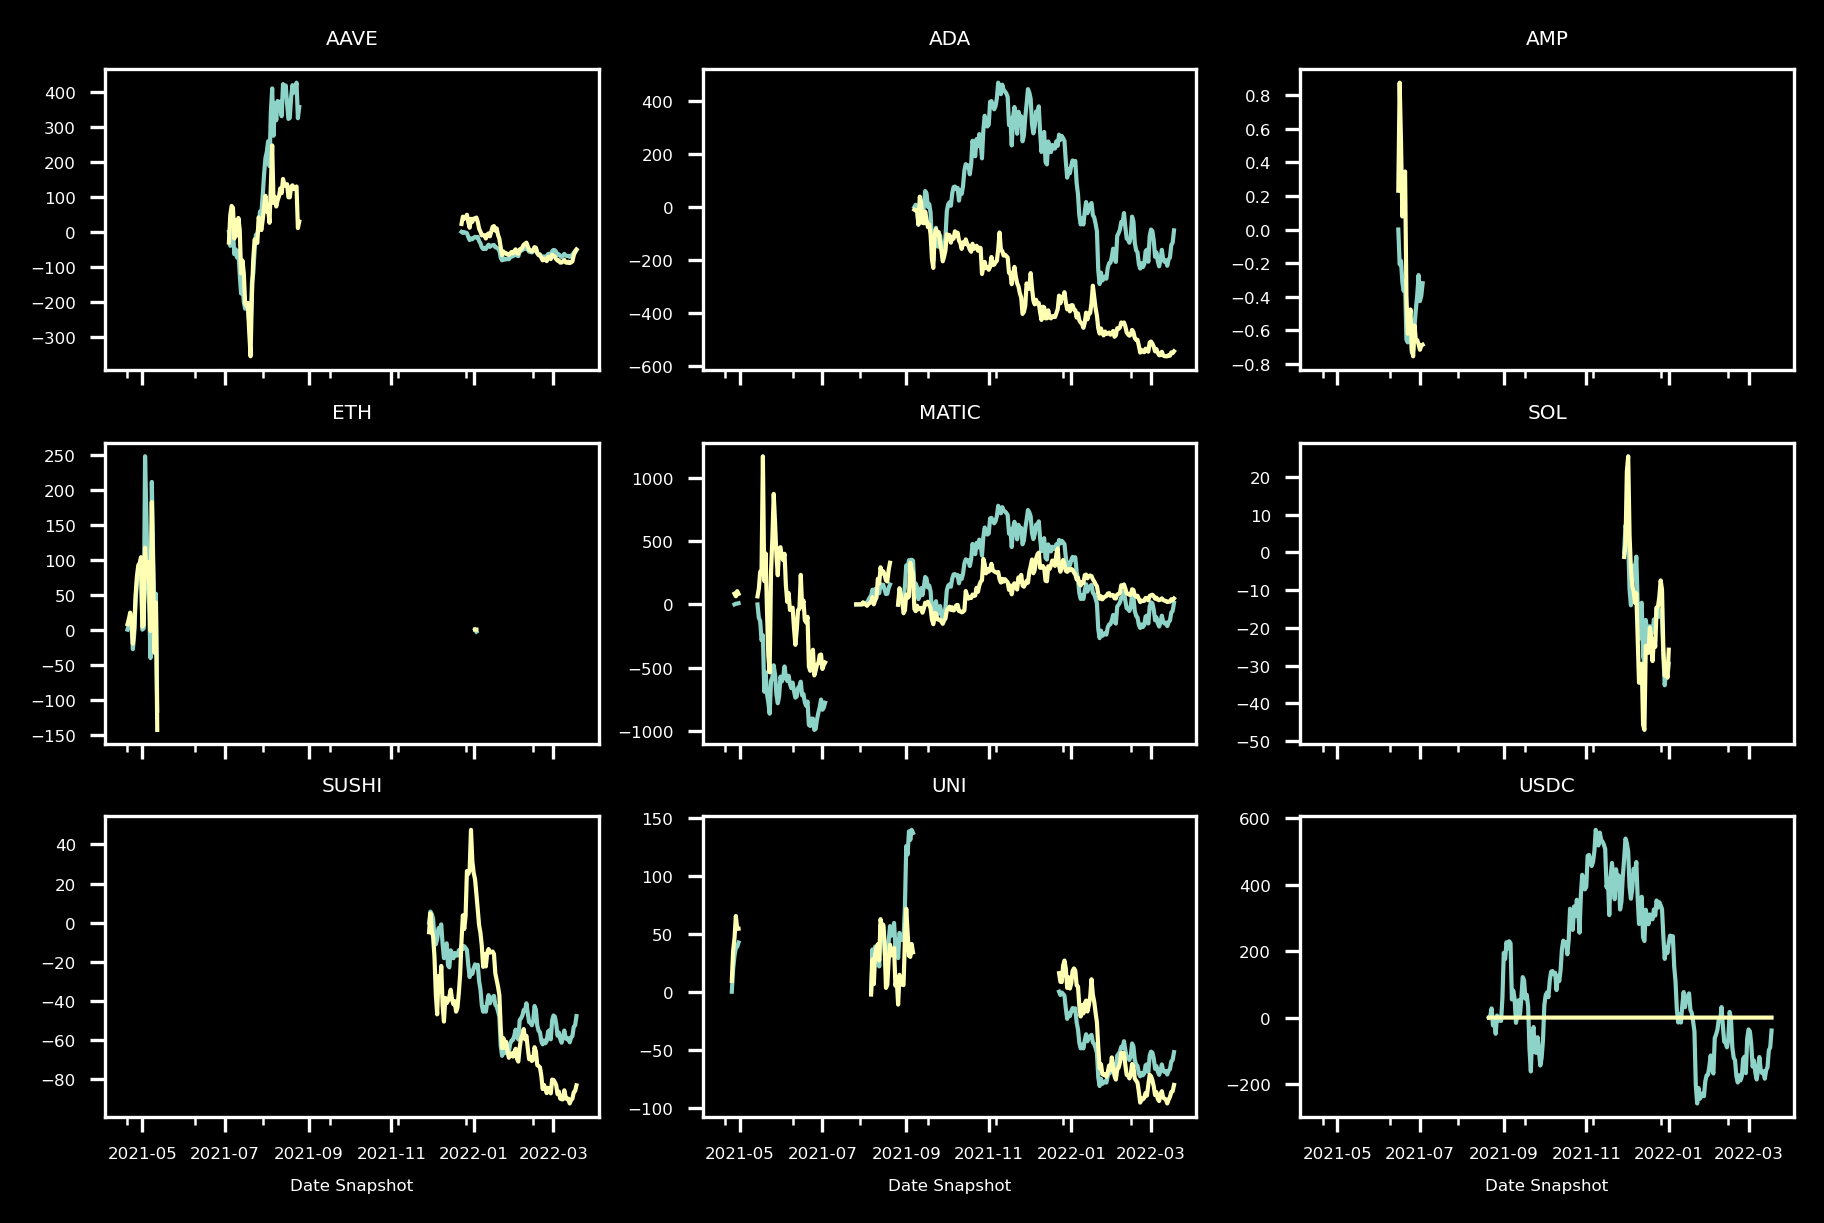

In [120]:
df=t.daily_grouped_metrics(
    combined_df, ["Benchmark Gain / (Loss)","Stock Gain / (Loss)"],
    by_symbol=True
    )
uniqs=df.columns.get_level_values(1).unique()
plt.rcParams.update({'font.size': 4})
select=[]
for coin in uniqs:
    if len(df[("value",coin)].dropna())>10:
        select.append(coin)
f,axes=plt.subplots(ncols=3,nrows=len(select)//3+len(select)%3,dpi=300,sharex=True)
for sel,ax in zip(select,axes.flatten()):
    df[("value",sel)].plot(ax=ax,legend=False,linewidth=1)
    ax.set_title(sel)
f.tight_layout()

#### Calplot

see investment throughout time.

In [121]:
values=t.daily_grouped_metrics(combined_df,["Stock Gain / (Loss)"])[("value")]
values.index=pd.to_datetime(values.index)
values=values.reset_index().set_index("Date Snapshot")
values

variable,Stock Gain / (Loss)
Date Snapshot,
2021-04-20,7.812817
2021-04-21,15.048026
2021-04-22,24.336908
2021-04-23,12.212170
2021-04-24,-39.242299
...,...
2022-03-14,-807.143938
2022-03-15,-803.335435
2022-03-16,-747.239791


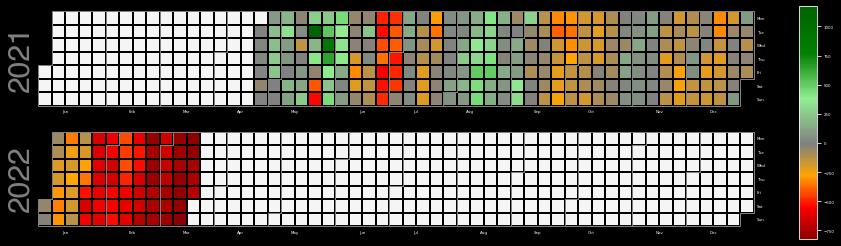

In [122]:
import calplot
from surfingcrypto.reporting.plotting import shiftedColorMap
import matplotlib.cm as cm
from matplotlib.colors import Normalize, LinearSegmentedColormap


norm = Normalize(vmin=values["Stock Gain / (Loss)"].min(), vmax=values["Stock Gain / (Loss)"].max())
cmap = shiftedColorMap(
    LinearSegmentedColormap.from_list(
        "colorbar",
        [
            "darkred",
            "red",
            "orange",
            "grey",
            "lightgreen",
            "green",
            "darkgreen",
        ],
    ),
    midpoint=norm(0)
)
c = calplot.calplot(
    values["Stock Gain / (Loss)"],
    cmap=cmap
    )

